In [1]:
# Python pakage for numerical processing
#Tech homework 1: also at https://github.com/Bruce1809/POS6729Spr21 
#First, we need to tell python that we want to import specific packages (bits of code) that allow us then to perform specific operations
#Networkx is used for network analysis
import networkx as nx 
# Data Visualisation library in Python
import matplotlib.pyplot as plt
# Python pakage for numerical processing
import seaborn as sns
import numpy as np
import pandas as pd
%pylab inline
import collections
# Python package to change directory
import os
#change the directory to where you have the files you will need to use
os.chdir('/Users/brucemiller/Google Drive/UCF Courses/POS6729-Political Network Analysis/JupyterNotebooks')
# Location of experiment run: /Users/brucemiller/Google Drive/Netlogo/Data/run1.csv

Populating the interactive namespace from numpy and matplotlib


In [157]:
# Use pandas to read in the txt file
data = pd.read_csv('matrix-smworldnw.txt',delim_whitespace=True,header=None)

In [158]:
print(data)

     0    1    2    3    4    5    6    7    8    9    ...  240  241  242  \
0    0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1    1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2    1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3    0.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
245  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
246  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
247  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
248  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
249  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

     243  244  245  246  247  248  249  
0    0.0  0.0  0.0  0.0  0.0  1.0 

In [159]:
outgroupx = nx.from_pandas_adjacency(data)
outgroupx.name = "Adoption network from adjacency matrix"
print(nx.info(outgroupx))

Name: Adoption network from adjacency matrix
Type: Graph
Number of nodes: 250
Number of edges: 500
Average degree:   4.0000


In [160]:
nx.diameter(outgroupx)

54

In [161]:
nx.average_shortest_path_length(outgroupx)

21.5550843373494

In [162]:
nx.average_clustering(outgroupx)

0.4929333333333332

In [163]:
np.average(list(dict(nx.degree(outgroupx)).values()))

4.0

In [164]:
np.average(list(nx.degree_centrality(outgroupx).values()))

0.016064257028112452

In [165]:
np.average(list(nx.closeness_centrality(outgroupx).values()))

0.04774423060050644

In [166]:
np.average(list(nx.betweenness_centrality(outgroupx).values()))

0.0828834045860863

In [167]:
nx.density(outgroupx)

0.01606425702811245

[]

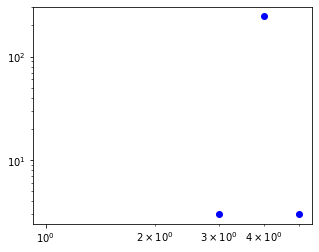

In [127]:
figure(figsize(5, 4))
plot(nx.degree_histogram(outgroupx), 'bo')
plt.loglog()

[]

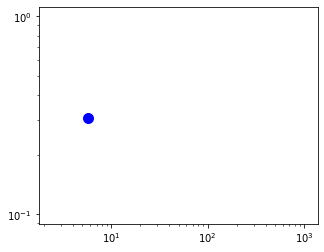

In [128]:
x, bins = np.histogram(list(dict(nx.degree(outgroupx)).values()),
                       bins=np.logspace(0, 10, num=9, base=2.),
                       density=True)
figure(figsize(5, 4))
plot(bins[1:], x, 'bo', markersize=10)
plt.loglog()

In [129]:
def gini(x):
    mad = np.abs(np.subtract.outer(x, x)).mean()  # mean abs diff.
    rmad = mad/np.mean(x)   # relative mad
    g = 0.5 * rmad   # Gini coeff.
    return g

In [130]:
degs=list(dict(outgroupx.degree()).values())
gidx=gini(degs)
print ('Gini index is: %.3f' % gidx)

Gini index is: 0.006


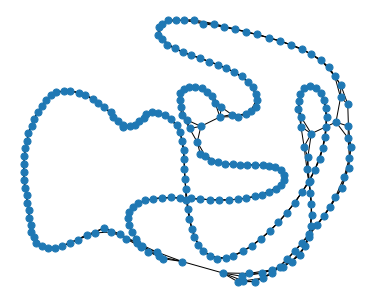

In [131]:
nx.draw(outgroupx, node_size=50)

[Text(0, 0, '5'), Text(0, 0, '4'), Text(0, 0, '3')]

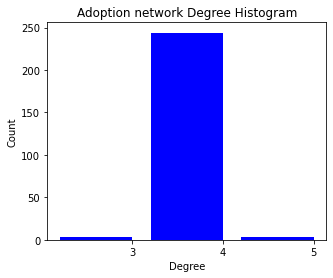

In [132]:
G = outgroupx

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Adoption network Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# In this section we analyze the data from the experiment run

The file is called run.csv.  The file was generated by NetLogo BehaviorSpace. For this simple experiment, we keep all variables fixed at their default levels to compare the outcome (polarization and adoption) of each network type with both a local and global view.  For data preparation, we have a few housekeeping tasks:
   1. Load data
   2. Remove the first six lines are related to information about the experiment.    
   3. Missing values: check how  many we have to consider. Determine a way to handle the missing values such as False or N/A
   4. Exploratory data analysis - cross-tab

In [19]:
adopt = pd.read_csv('run1.csv',skiprows=6)
adopt.rename(columns={'Environment-type': 'environment_type','number-of-nodes': 'number_of_nodes','prob-m':'prob_m','local-links':'local_links',
                     'share-min': 'share_min','prob-f': 'prob_f','average-node-degree':'average_node_degree','rewire-probability':
                     'rewire_probability','neighborhood-links':'neighborhood_links','y-value':'y_value','global-adoption':'global_adoption',
                     'connection-probability':'connection_probability','group0-adoption':'group0_adoption','group1-adoption':'group1_adoption',
                     'global-polarization':'global_polarization','avg-betweenness-centrality':'avg_betweenness_centrality','mean-path-length':'mean_path_length',
                     'average-degree':'average_degree','avg-local-clustering-coeff':'avg_local_clustering_coeff','eigenvector-centrality':'eigenvector_centrality'},
            inplace=True)
adopt.info(null_counts=True)

adopt.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   [run number]                400 non-null    int64  
 1   environment_type            400 non-null    object 
 2   Q                           400 non-null    float64
 3   seeds                       400 non-null    int64  
 4   lambda                      400 non-null    float64
 5   ingroupBias                 400 non-null    int64  
 6   number_of_nodes             400 non-null    int64  
 7   connection_probability      400 non-null    float64
 8   prob_m                      400 non-null    float64
 9   beta                        400 non-null    int64  
 10  local_links                 400 non-null    int64  
 11  startpatch                  400 non-null    object 
 12  share_min                   400 non-null    int64  
 13  prob_f                      400 non

,[run number],environment_type,Q,seeds,lambda,ingroupBias,number_of_nodes,connection_probability,prob_m,beta,...,global_adoption,group0_adoption,group1_adoption,global_polarization,density,avg_betweenness_centrality,mean_path_length,average_degree,avg_local_clustering_coeff,eigenvector_centrality
0,2,random-network,0.9,5,0.3,1,250,0.06,0.05,1,...,0.261803,0.333333,0.189655,0.278689,0.009250,43.004292,false,2.145923,0.218455,0.508987
1,3,small-world-network,0.9,5,0.3,1,250,0.06,0.05,1,...,0.612000,0.598291,0.624060,0.084967,0.016064,2612.636000,21.9850281124498,4.000000,0.494400,0.353630
2,1,scale-free-network,0.9,5,0.3,1,250,0.06,0.05,1,...,0.676000,0.717742,0.634921,0.053254,0.008000,518.364000,5.163566265060241,1.992000,0.000000,0.044711


In [21]:
pd.pivot_table(adopt,index = ['environment_type','infores'],values=['global_adoption','global_polarization'],
               aggfunc={'global_adoption':np.mean,'global_polarization':np.mean},
                 margins=True)

global_adoption  global_polarization
environment_type    infores                                      
lattice             global          0.729671             0.300498
                    local           0.657268             0.189148
random-network      global          1.000000             0.044632
                    local           0.161459             0.166383
scale-free-network  global          1.000000             0.052640
                    local           0.711840             0.068792
small-world-network global          1.000000             0.057600
                    local           0.737360             0.102404
All                                 0.749700             0.122762

In [27]:
pd.pivot_table(adopt,index = ['environment_type','infores'],values=['global_adoption','group0_adoption','group1_adoption',
                                                                    'global_polarization'],margins=True)


global_adoption  global_polarization  \
environment_type    infores                                         
lattice             global          0.729671             0.300498   
                    local           0.657268             0.189148   
random-network      global          1.000000             0.044632   
                    local           0.161459             0.166383   
scale-free-network  global          1.000000             0.052640   
                    local           0.711840             0.068792   
small-world-network global          1.000000             0.057600   
                    local           0.737360             0.102404   
All                                 0.749700             0.122762   

                             group0_adoption  group1_adoption  
environment_type    infores                                    
lattice             global          0.853041         0.575459  
                    local           0.703531         0.599439  
random-network      global          1.000000         1.000000  
                    local           0.164214         0.158312  
scale-free-network  global          1.000000         1.000000  
                    local           0.713732         0.709034  
small-world-network global          1.000000         1.000000  
                    local           0.729071         0.742793  
All                                 0.770449         0.723130

In [33]:
pd.pivot_table(adopt,index = ['environment_type','infores'],values=['global_adoption','global_polarization'],
               aggfunc=[np.mean,np.std],
                 margins=True)

mean                      \
                            global_adoption global_polarization   
environment_type    infores                                       
lattice             global         0.729671            0.300498   
                    local          0.657268            0.189148   
random-network      global         1.000000            0.044632   
                    local          0.161459            0.166383   
scale-free-network  global         1.000000            0.052640   
                    local          0.711840            0.068792   
small-world-network global         1.000000            0.057600   
                    local          0.737360            0.102404   
All                                0.749700            0.122762   

                                        std                      
                            global_adoption global_polarization  
environment_type    infores                                      
lattice             global         0.027167            0.050155  
                    local          0.018707            0.034574  
random-network      global         0.000000            0.035868  
                    local          0.063036            0.127794  
scale-free-network  global         0.000000            0.033597  
                    local          0.122821            0.051438  
small-world-network global         0.000000            0.045197  
                    local          0.142497            0.057402  
All                                0.270220            0.103879

In [34]:
pd.crosstab(adopt.environment_type, adopt.infores )

infores,global,local
environment_type,,
lattice,50,50
random-network,50,50
scale-free-network,50,50
small-world-network,50,50


In [75]:
#correlation after removing lattice column
networksonly = adopt[adopt.environment_type != 'lattice']
print(networksonly.info())
networksonly.corr(method ='spearman')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 397
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   [run number]                300 non-null    int64  
 1   environment_type            300 non-null    object 
 2   Q                           300 non-null    float64
 3   seeds                       300 non-null    int64  
 4   lambda                      300 non-null    float64
 5   ingroupBias                 300 non-null    int64  
 6   number_of_nodes             300 non-null    int64  
 7   connection_probability      300 non-null    float64
 8   prob_m                      300 non-null    float64
 9   beta                        300 non-null    int64  
 10  local_links                 300 non-null    int64  
 11  startpatch                  300 non-null    object 
 12  share_min                   300 non-null    int64  
 13  prob_f                      300 non

,[run number],Q,seeds,lambda,ingroupBias,number_of_nodes,connection_probability,prob_m,beta,local_links,...,[step],global_adoption,group0_adoption,group1_adoption,global_polarization,density,avg_betweenness_centrality,average_degree,avg_local_clustering_coeff,eigenvector_centrality
[run number],1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.009755,0.008188,0.014144,0.022551,0.005035,0.008753,0.005035,0.017146,0.013125
Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seeds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lambda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ingroupBias,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_nodes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
connection_probability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prob_m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
local_links,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


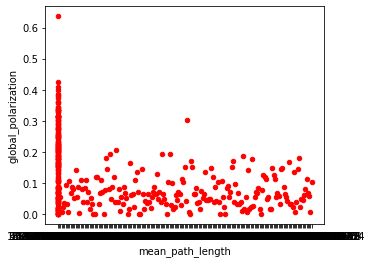

In [38]:
ax1 = adopt.plot(kind='scatter', x='mean_path_length', y='global_polarization', color='r')    
#ax2 = adopt.plot(kind='scatter', x='mean_path_length', y='global_polarization', color='g', ax=ax1)    
#ax3 = adopt.plot(kind='scatter', x='density', y='global_polarization', color='b', ax=ax1)
#print(ax1 == ax2 == ax3)  # True

In [80]:
allnetworks = adopt[adopt.environment_type != 'lattice']
allnetworks.info()
pd.pivot_table(allnetworks,index=["environment_type"],values=['density','avg_betweenness_centrality',
                                                        'eigenvector_centrality','mean_path_length','avg_local_clustering_coeff','average_degree'],
               aggfunc=[np.mean],fill_value=0,margins=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 397
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   [run number]                300 non-null    int64  
 1   environment_type            300 non-null    object 
 2   Q                           300 non-null    float64
 3   seeds                       300 non-null    int64  
 4   lambda                      300 non-null    float64
 5   ingroupBias                 300 non-null    int64  
 6   number_of_nodes             300 non-null    int64  
 7   connection_probability      300 non-null    float64
 8   prob_m                      300 non-null    float64
 9   beta                        300 non-null    int64  
 10  local_links                 300 non-null    int64  
 11  startpatch                  300 non-null    object 
 12  share_min                   300 non-null    int64  
 13  prob_f                      300 non

mean                             \
                    average_degree avg_betweenness_centrality   
environment_type                                                
random-network            2.205473                   31.70570   
scale-free-network        1.992000                  566.19164   
small-world-network       4.000000                 2110.39784   
All                       2.732491                  902.76506   

                                                          \
                    avg_local_clustering_coeff   density   
environment_type                                           
random-network                        0.288961  0.009775   
scale-free-network                    0.000000  0.008000   
small-world-network                   0.486051  0.016064   
All                                   0.258337  0.011280   

                                            
                    eigenvector_centrality  
environment_type                            
random-network                    0.532077  
scale-free-network                0.046906  
small-world-network               0.379803  
All                               0.319595

In [40]:
#Filter out random and lattice network values for mean path length (all were false because network was incomplete)
onlynetworks= adopt[adopt.mean_path_length != 'false']
onlynetworks.describe(include=['O'])

,environment_type,startpatch,filename,infores,mean_path_length
count,200,200,200,200,200
unique,2,1,1,2,200
top,scale-free-network,equal,matrix,global,5.72118875502008
freq,100,200,200,100,1


In [41]:
#convert string to float for mean_path_length
#dfmi.loc[:, ('one', 'second')]
#onlynetworks['mean_path_length'] = onlynetworks['mean_path_length'].astype(float)
#onlynetworks['mean_path_length'] = onlynetworks.loc[:,'mean_path_length'].astype(float)
onlynetworks['mean_path_length'] = onlynetworks.loc[:,'mean_path_length'].astype(float)

<ipython-input-41-8d213b75db29>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onlynetworks['mean_path_length'] = onlynetworks.loc[:,'mean_path_length'].astype(float)


In [42]:
#only includes the three networks: random, small world and scale-free
allnetworks = adopt[adopt.environment_type != 'lattice']
allnetworks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 397
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   [run number]                300 non-null    int64  
 1   environment_type            300 non-null    object 
 2   Q                           300 non-null    float64
 3   seeds                       300 non-null    int64  
 4   lambda                      300 non-null    float64
 5   ingroupBias                 300 non-null    int64  
 6   number_of_nodes             300 non-null    int64  
 7   connection_probability      300 non-null    float64
 8   prob_m                      300 non-null    float64
 9   beta                        300 non-null    int64  
 10  local_links                 300 non-null    int64  
 11  startpatch                  300 non-null    object 
 12  share_min                   300 non-null    int64  
 13  prob_f                      300 non

In [43]:
onlynetworks.info(null_counts=True) #only includes sw and sf networks

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 397
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   [run number]                200 non-null    int64  
 1   environment_type            200 non-null    object 
 2   Q                           200 non-null    float64
 3   seeds                       200 non-null    int64  
 4   lambda                      200 non-null    float64
 5   ingroupBias                 200 non-null    int64  
 6   number_of_nodes             200 non-null    int64  
 7   connection_probability      200 non-null    float64
 8   prob_m                      200 non-null    float64
 9   beta                        200 non-null    int64  
 10  local_links                 200 non-null    int64  
 11  startpatch                  200 non-null    object 
 12  share_min                   200 non-null    int64  
 13  prob_f                      200 non

In [81]:
#This table was done only for the small world and scale-free entworks (onlynetworks)
pd.pivot_table(onlynetworks,index=["environment_type"],values=['density','avg_betweenness_centrality',
                                                        'eigenvector_centrality','avg_local_clustering_coeff','mean_path_length','average_degree'],
               aggfunc=[np.mean],fill_value=0,margins=True)

mean                             \
                    average_degree avg_betweenness_centrality   
environment_type                                                
scale-free-network           1.992                  566.19164   
small-world-network          4.000                 2110.39784   
All                          2.996                 1338.29474   

                                                          \
                    avg_local_clustering_coeff   density   
environment_type                                           
scale-free-network                    0.000000  0.008000   
small-world-network                   0.486051  0.016064   
All                                   0.243025  0.012032   

                                                             
                    eigenvector_centrality mean_path_length  
environment_type                                             
scale-free-network                0.046906         5.547724  
small-world-network               0.379803        17.950987  
All                               0.213354        11.749355

In [58]:
#This is only for small world and scale free networks (N=200)
onlynetworks.corr()

,[run number],Q,seeds,lambda,ingroupBias,number_of_nodes,connection_probability,prob_m,beta,local_links,...,global_adoption,group0_adoption,group1_adoption,global_polarization,density,avg_betweenness_centrality,mean_path_length,average_degree,avg_local_clustering_coeff,eigenvector_centrality
[run number],1.000000,0.000000e+00,NaN,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,...,2.127722e-03,-7.827674e-03,1.149930e-02,4.043678e-02,8.660362e-03,2.219578e-02,2.219578e-02,8.660362e-03,8.993564e-03,6.441306e-03
Q,0.000000,1.000000e+00,NaN,-1.000000e+00,NaN,NaN,1.000000e+00,1.000000e+00,NaN,NaN,...,1.104767e-15,-8.493975e-16,7.905763e-16,-1.189081e-15,3.441802e-15,-4.712176e-16,4.756012e-16,4.880772e-16,-1.688361e-16,4.241338e-16
seeds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lambda,0.000000,-1.000000e+00,NaN,1.000000e+00,NaN,NaN,-1.000000e+00,-1.000000e+00,NaN,NaN,...,-1.037568e-15,8.277538e-16,-8.334435e-16,1.181152e-15,-3.441802e-15,4.792964e-16,-5.062754e-16,-3.724799e-16,1.192330e-16,-4.410885e-16
ingroupBias,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_nodes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
connection_probability,0.000000,1.000000e+00,NaN,-1.000000e+00,NaN,NaN,1.000000e+00,1.000000e+00,NaN,NaN,...,1.077056e-15,-8.576468e-16,8.280942e-16,-1.168282e-15,3.441802e-15,-4.867061e-16,5.001323e-16,4.423199e-16,-1.484403e-16,4.328991e-16
prob_m,0.000000,1.000000e+00,NaN,-1.000000e+00,NaN,NaN,1.000000e+00,1.000000e+00,NaN,NaN,...,1.095062e-15,-8.683877e-16,8.064338e-16,-1.204146e-15,3.441802e-15,-4.730300e-16,4.830482e-16,4.423199e-16,-1.699071e-16,4.325910e-16
beta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
local_links,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


                            global_adoption  group0_adoption  group1_adoption  \
global_adoption                    1.000000         0.997105         0.997119   
group0_adoption                    0.997105         1.000000         0.988502   
group1_adoption                    0.997119         0.988502         1.000000   
global_polarization               -0.545317        -0.551779        -0.538911   
density                            0.153795         0.145467         0.159601   
avg_betweenness_centrality         0.276256         0.266470         0.282567   
average_degree                     0.195701         0.187179         0.201377   
avg_local_clustering_coeff        -0.025164        -0.031614        -0.019738   
eigenvector_centrality            -0.320124        -0.321235        -0.317506   

                            global_polarization   density  \
global_adoption                       -0.545317  0.153795   
group0_adoption                       -0.551779  0.145467   
group1

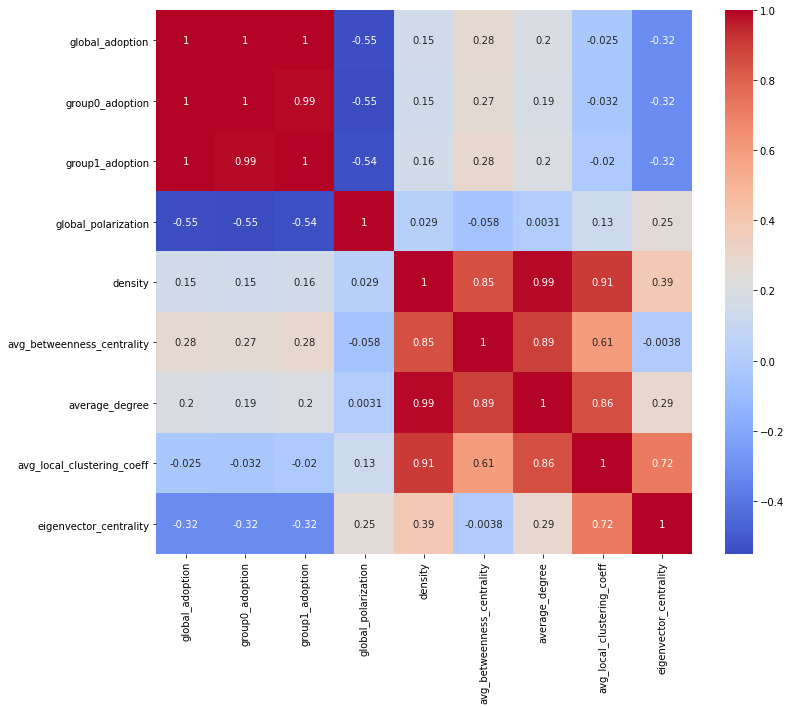

In [79]:
#More work to clean up the correlation and see if it can be visualized on heat map
# Drop not applicable columns using this command:  df.drop('a', inplace=True, axis=1):
#this is for ALL NETOWRKS: random, small world and scale free
corrfile = allnetworks.drop(columns= ['[run number]','Q','seeds','lambda','ingroupBias','number_of_nodes','connection_probability',
                            'prob_m','local_links','beta','share_min','prob_f','average_node_degree',
                             'rewire_probability','neighborhood_links','memory','y_value','[step]','observed'] )
print(corrfile.corr())
figure(figsize(12, 10))
sns.heatmap(corrfile.corr(), annot = True, cmap= 'coolwarm')


                            global_adoption  group0_adoption  group1_adoption  \
global_adoption                    1.000000         0.989443         0.988749   
group0_adoption                    0.989443         1.000000         0.956776   
group1_adoption                    0.988749         0.956776         1.000000   
global_polarization               -0.372862        -0.388480        -0.357593   
density                            0.038324         0.022484         0.050665   
avg_betweenness_centrality        -0.029213        -0.047116        -0.013270   
mean_path_length                  -0.029213        -0.047116        -0.013270   
average_degree                     0.038324         0.022484         0.050665   
avg_local_clustering_coeff         0.037247         0.021268         0.049734   
eigenvector_centrality            -0.019616        -0.034916        -0.007582   

                            global_polarization   density  \
global_adoption                       -0.372862

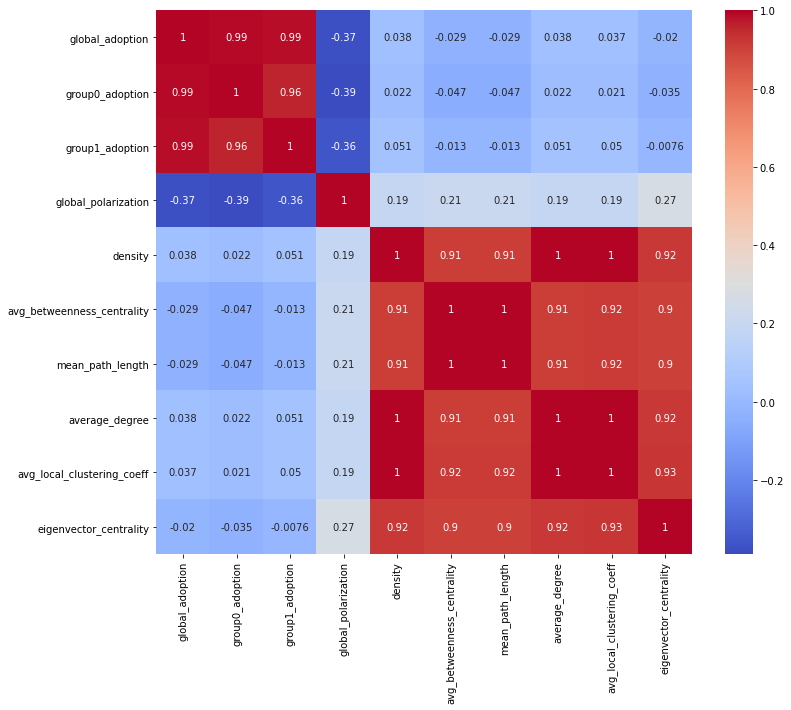

In [72]:
#More work to clean up the correlation and see if it can be visualized on heat map
# Drop not applicable columns using this command:  df.drop('a', inplace=True, axis=1):
#this is for SMALL WORLD AND SCALE-FREE NETWORKS: random, small world and scale free
corrfile = onlynetworks.drop(columns= ['[run number]','Q','seeds','lambda','ingroupBias','number_of_nodes','connection_probability',
                            'prob_m','local_links','beta','share_min','prob_f','average_node_degree',
                             'rewire_probability','neighborhood_links','memory','y_value','[step]','observed'] )
print(corrfile.corr())
figure(figsize(12, 10))
sns.heatmap(corrfile.corr(), annot = True, cmap= 'coolwarm')

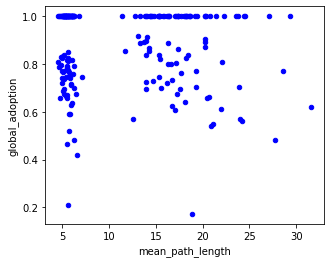

In [45]:
#only includes small world and scale free in "onlynetworks" because random network had string values of "false" for 
# mean path length - so for this comparison, we just are looking at the two networks: small world and scale free
ax1 = onlynetworks.plot(kind='scatter', x='mean_path_length', y='global_adoption', color='b')    

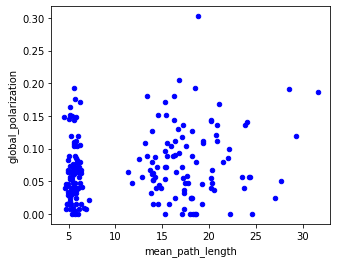

In [46]:
ax1 = onlynetworks.plot(kind='scatter', x='mean_path_length', y='global_polarization', color='b') 

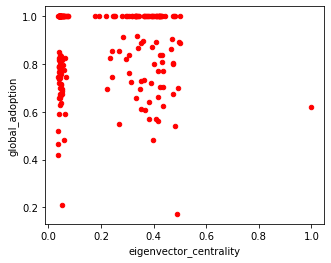

In [47]:
ax1 = onlynetworks.plot(kind='scatter', x='eigenvector_centrality', y='global_adoption', color='r') 

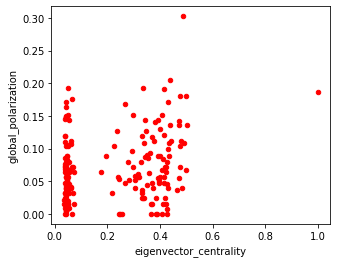

In [48]:
ax1 = onlynetworks.plot(kind='scatter', x='eigenvector_centrality', y='global_polarization', color='r') 

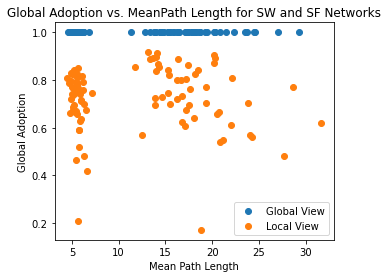

In [49]:
globalonlynw = onlynetworks[onlynetworks['infores'] == 'global']
localonlynw = onlynetworks[onlynetworks['infores'] == 'local']
x1 = globalonlynw.mean_path_length
#y1 = [4, 5, 6]
y1 = globalonlynw.global_adoption
#x2 = [1, 3, 5]
x2 = localonlynw.mean_path_length
#y2 = [6, 5, 4]
y2 = localonlynw.global_adoption
plt.scatter(x1,y1)
plt.scatter(x2, y2)
plt.title("Global Adoption vs. MeanPath Length for SW and SF Networks")
plt.xlabel("Mean Path Length")
plt.ylabel("Global Adoption")
plt.legend(["Global View", "Local View"])


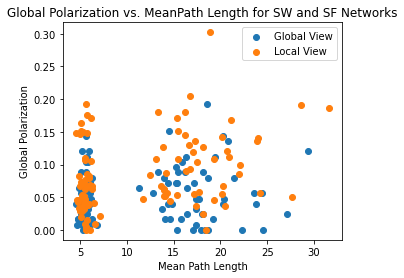

In [50]:
globalonlynw = onlynetworks[onlynetworks['infores'] == 'global']
localonlynw = onlynetworks[onlynetworks['infores'] == 'local']
x1 = globalonlynw.mean_path_length
#y1 = [4, 5, 6]
y1 = globalonlynw.global_polarization
#x2 = [1, 3, 5]
x2 = localonlynw.mean_path_length
#y2 = [6, 5, 4]
y2 = localonlynw.global_polarization
plt.scatter(x1,y1)
plt.scatter(x2, y2)
plt.title("Global Polarization vs. MeanPath Length for SW and SF Networks")
plt.xlabel("Mean Path Length")
plt.ylabel("Global Polarization")
plt.legend(["Global View", "Local View"])



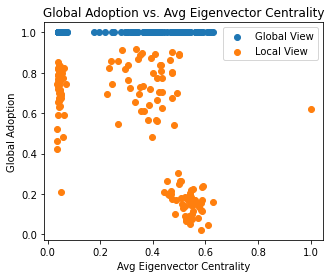

In [51]:
#df_SN7577_some_rows = df_SN7577[(df_SN7577.Q2 == -1)]
#df_SN7577_some_rows
#above_35 = titanic[titanic["Age"] > 35]
#Defined to include all networks (including random)
globalonlynw = allnetworks[allnetworks['infores'] == 'global']
localonlynw = allnetworks[allnetworks['infores'] == 'local']
#x1 = [1, 2, 3]          plt.plot(a[0][a[5]==0], a[1][a[5]==0]
x1 = globalonlynw.eigenvector_centrality
#y1 = [4, 5, 6]
y1 = globalonlynw.global_adoption
#x2 = [1, 3, 5]
x2 = localonlynw.eigenvector_centrality
#y2 = [6, 5, 4]
y2 = localonlynw.global_adoption
plt.scatter(x1,y1)
plt.scatter(x2, y2)
plt.title("Global Adoption vs. Avg Eigenvector Centrality")
plt.xlabel("Avg Eigenvector Centrality")
plt.ylabel("Global Adoption")
plt.legend(["Global View", "Local View"])

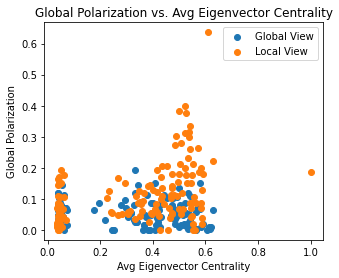

In [170]:
#df_SN7577_some_rows = df_SN7577[(df_SN7577.Q2 == -1)]
#df_SN7577_some_rows
#above_35 = titanic[titanic["Age"] > 35]
#Defined to include all networks (including random)
globalonlynw = allnetworks[allnetworks['infores'] == 'global']
localonlynw = allnetworks[allnetworks['infores'] == 'local']
#x1 = [1, 2, 3]          plt.plot(a[0][a[5]==0], a[1][a[5]==0]
x1 = globalonlynw.eigenvector_centrality
#y1 = [4, 5, 6]
y1 = globalonlynw.global_polarization
#x2 = [1, 3, 5]
x2 = localonlynw.eigenvector_centrality
#y2 = [6, 5, 4]
y2 = localonlynw.global_polarization
plt.scatter(x1,y1)
plt.scatter(x2, y2)
plt.title("Global Polarization vs. Avg Eigenvector Centrality")
plt.xlabel("Avg Eigenvector Centrality")
plt.ylabel("Global Polarization")
plt.legend(["Global View", "Local View"])

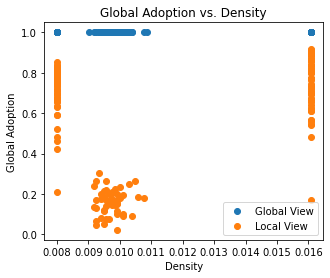

In [52]:
x1 = globalonlynw.density
#y1 = [4, 5, 6]
y1 = globalonlynw.global_adoption
#x2 = [1, 3, 5]
x2 = localonlynw.density
#y2 = [6, 5, 4]
y2 = localonlynw.global_adoption
plt.scatter(x1,y1)
plt.scatter(x2, y2)
plt.title("Global Adoption vs. Density")
plt.xlabel("Density")
plt.ylabel("Global Adoption")
plt.legend(["Global View", "Local View"])

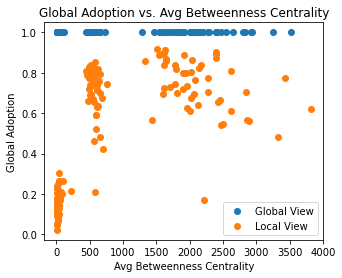

In [53]:
x1 = globalonlynw.avg_betweenness_centrality
#y1 = [4, 5, 6]
y1 = globalonlynw.global_adoption
#x2 = [1, 3, 5]
x2 = localonlynw.avg_betweenness_centrality
#y2 = [6, 5, 4]
y2 = localonlynw.global_adoption
plt.scatter(x1,y1)
plt.scatter(x2, y2)
plt.title("Global Adoption vs. Avg Betweenness Centrality")
plt.xlabel("Avg Betweenness Centrality")
plt.ylabel("Global Adoption")
plt.legend(["Global View", "Local View"])

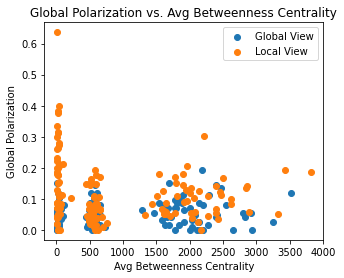

In [169]:
x1 = globalonlynw.avg_betweenness_centrality
#y1 = [4, 5, 6]
y1 = globalonlynw.global_polarization
#x2 = [1, 3, 5]
x2 = localonlynw.avg_betweenness_centrality
#y2 = [6, 5, 4]
y2 = localonlynw.global_polarization
plt.scatter(x1,y1)
plt.scatter(x2, y2)
plt.title("Global Polarization vs. Avg Betweenness Centrality")
plt.xlabel("Avg Betweenness Centrality")
plt.ylabel("Global Polarization")
plt.legend(["Global View", "Local View"])

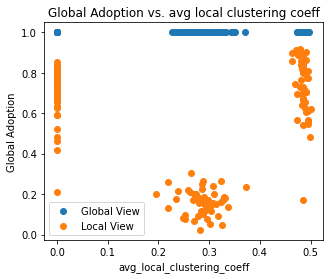

In [54]:
x1 = globalonlynw.avg_local_clustering_coeff
#y1 = [4, 5, 6]
y1 = globalonlynw.global_adoption
#x2 = [1, 3, 5]
x2 = localonlynw.avg_local_clustering_coeff
#y2 = [6, 5, 4]
y2 = localonlynw.global_adoption
plt.scatter(x1,y1)
plt.scatter(x2, y2)
plt.title("Global Adoption vs. avg local clustering coeff")
plt.xlabel("avg_local_clustering_coeff")
plt.ylabel("Global Adoption")
plt.legend(["Global View", "Local View"])

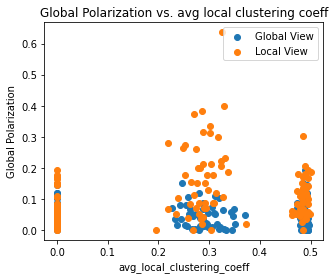

In [55]:
x1 = globalonlynw.avg_local_clustering_coeff
#y1 = [4, 5, 6]
y1 = globalonlynw.global_polarization
#x2 = [1, 3, 5]
x2 = localonlynw.avg_local_clustering_coeff
#y2 = [6, 5, 4]
y2 = localonlynw.global_polarization
plt.scatter(x1,y1)
plt.scatter(x2, y2)
plt.title("Global Polarization vs. avg local clustering coeff")
plt.xlabel("avg_local_clustering_coeff")
plt.ylabel("Global Polarization")
plt.legend(["Global View", "Local View"])

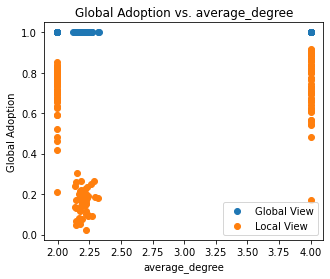

In [56]:
x1 = globalonlynw.average_degree
#y1 = [4, 5, 6]
y1 = globalonlynw.global_adoption
#x2 = [1, 3, 5]
x2 = localonlynw.average_degree
#y2 = [6, 5, 4]
y2 = localonlynw.global_adoption
plt.scatter(x1,y1)
plt.scatter(x2, y2)
plt.title("Global Adoption vs. average_degree")
plt.xlabel("average_degree")
plt.ylabel("Global Adoption")
plt.legend(["Global View", "Local View"])

In [57]:
localonlynw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 393
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   [run number]                150 non-null    int64  
 1   environment_type            150 non-null    object 
 2   Q                           150 non-null    float64
 3   seeds                       150 non-null    int64  
 4   lambda                      150 non-null    float64
 5   ingroupBias                 150 non-null    int64  
 6   number_of_nodes             150 non-null    int64  
 7   connection_probability      150 non-null    float64
 8   prob_m                      150 non-null    float64
 9   beta                        150 non-null    int64  
 10  local_links                 150 non-null    int64  
 11  startpatch                  150 non-null    object 
 12  share_min                   150 non-null    int64  
 13  prob_f                      150 non